In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from skimage.io import imread
from skimage.feature import hog
import matplotlib.pyplot as plt
from utilities import *
from sklearn.cluster import KMeans

PyDIPjavaio unavailable:
DLL load failed while importing PyDIPjavaio: The specified module could not be found.

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


In [19]:
dip_images, dip_names = load_dip_images('data')
dip_blues, dip_names = load_dip_images('blues')
dip_grays, dip_names = load_dip_images('gray')
dip_thresh, dip_names = load_dip_images('thresh')
dip_transf, dip_names = load_dip_images('transf')
blue_areas, dip_names = load_dip_images('blue_areas')
blue_grays, dip_names = load_dip_images('blue_grays')
hog_imgs_shape, dip_names = load_dip_images('hog_embryos')
hog_imgs_blue, dip_names = load_dip_images('hog_blues')
crop_original, dip_names = load_dip_images('crop_original')


In [20]:
features = ['Perimeter', 'Size',
                'Circularity', 'Roundness',
                'StandardDeviation', 'Minimum','Maximum']

label_images, measurements = measure_elements(dip_transf,dip_blues, features)

areas, perimeters, circularity, roundness, stand_dev, minimum, maximum = measurements_array(measurements, features)

In [21]:
label_images, measurements = measure_elements(dip_transf, dip_blues, features)
areas, perimeters, circularity, roundness, stand_dev, minimum, maximum = measurements_array(measurements, features)
blue_areas, m_blues, blue_grays = blue_area(crop_original,features)
areas_blue, perimeters_blue, circularity_blue, roundness_blue, std_blue, minimum_blue, maximum_blue = measurements_array(m_blues, features)


In [22]:
tot_area_blue = []
tot_perim_blue = []
tot_std_blue = []
for i in range(len(areas_blue)):
    tot_area_blue.append(np.sum(areas_blue[i]))
    tot_perim_blue.append(np.sum(perimeters_blue[i]))
    tot_std_blue.append(np.sum(std_blue[i]))

blue_rel_area = np.divide(tot_area_blue,areas)
blue_rel_perim = np.divide(tot_perim_blue,perimeters)
perc_area_blues = blue_rel_area*100
perc_perim_blues = blue_rel_perim*100

In [23]:
d = {'area': areas, 'perimeter': perimeters, 'roundness':roundness, 'circularity':circularity, 
                'area_blue': tot_area_blue, 'perimeter_blue': tot_perim_blue,
                'relative_blue_area': blue_rel_area, 'relative_perim_area': blue_rel_perim,
                'percentage_area_blue': perc_area_blues, 'percentage_perim_blue': perc_perim_blues, 'std_blue':tot_std_blue}
df = pd.DataFrame(data=d)

In [24]:
df

,area,perimeter,roundness,circularity,area_blue,perimeter_blue,relative_blue_area,relative_perim_area,percentage_area_blue,percentage_perim_blue,std_blue
0,241016.0,3968.359593,0.192324,0.451109,53887.0,1002.285593,0.223583,0.252569,22.358267,25.256925,26.308678
1,275354.0,3290.483593,0.319582,0.346439,94154.0,1174.981593,0.341938,0.357085,34.193801,35.708477,24.426962
2,219718.0,3438.347593,0.233548,0.437629,54417.0,875.217593,0.247667,0.254546,24.766746,25.454599,25.222056
3,200776.0,2904.580593,0.299058,0.391650,81695.0,1181.038593,0.406896,0.406612,40.689624,40.661244,24.863399
4,230397.0,2963.817593,0.329597,0.321202,59562.0,897.937593,0.258519,0.302967,25.851899,30.296655,23.722342
5,294532.0,3391.188593,0.321839,0.329261,155941.0,2275.297593,0.529454,0.670944,52.945351,67.094399,25.614290
6,295773.0,3242.297593,0.353560,0.332385,56010.0,934.981593,0.189368,0.288370,18.936820,28.837007,25.332285
7,147439.0,2782.463593,0.239311,0.435851,6623.0,212.319593,0.044920,0.076306,4.492027,7.630633,3.915688
8,304673.0,3965.037593,0.243528,0.408417,65202.0,1015.309593,0.214006,0.256066,21.400649,25.606557,24.023020
9,197841.0,2762.901593,0.325683,0.377931,53619.0,955.089593,0.271021,0.345684,27.102067,34.568354,20.831581


In [25]:
d = {'std_embryo':stand_dev,'std_blue':tot_std_blue}
df_texture = pd.DataFrame(data=d)

In [26]:
df_texture

,std_embryo,std_blue
0,7740.395714,26.308678
1,5695.464428,24.426962
2,7685.433787,25.222056
3,7645.016908,24.863399
4,5809.096952,23.722342
5,4317.593094,25.614290
6,4891.695499,25.332285
7,6505.743367,3.915688
8,7324.183548,24.023020
9,8605.818319,20.831581


(array([ 3., 16., 21., 10.,  4.,  2.,  1.,  0.,  0.,  1.]),
 array([ 4317.59309373,  5544.25671359,  6770.92033346,  7997.58395332,
         9224.24757319, 10450.91119305, 11677.57481292, 12904.23843279,
        14130.90205265, 15357.56567252, 16584.22929238]),
 <BarContainer object of 10 artists>)

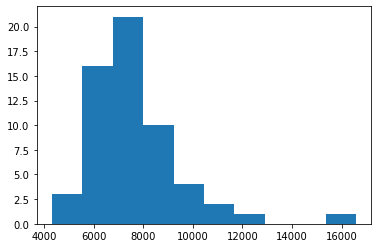

In [27]:
plt.hist(stand_dev) 


(array([ 1.,  0.,  0.,  0.,  0.,  2.,  1., 12., 27., 15.]),
 array([ 3.91568835,  6.52801868,  9.14034901, 11.75267934, 14.36500968,
        16.97734001, 19.58967034, 22.20200067, 24.81433101, 27.42666134,
        30.03899167]),
 <BarContainer object of 10 artists>)

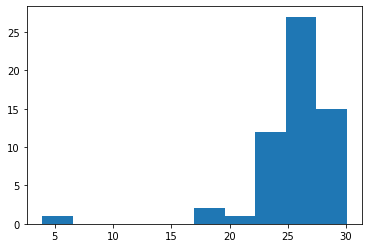

In [28]:
plt.hist(tot_std_blue)